In [1]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt

### Полиномиальная система:
$$
\begin{cases}\Large
x_1' = x_2 \\ \Large
x_2' = -k^2 * x_3 \\ \Large
x_3' = x_2 * x_4 \\\Large
x_4' = -x_2 * x_3
\end{cases}
$$

#### Начальные условия:
$x_1(t_0) = \phi_0 $

$x_2(t_0) = \phi_0'$

$x_3(t_0) = sin(\phi_0)$

$x_4(t_0) = cos(\phi_0)$

#### Начальные данные и константы

In [2]:
gravity = 9.8
length = 1
k = sqrt(gravity / length)

phi_0 = np.pi / 6
phi_0_dot = 1.0

x0 = np.array([phi_0, phi_0_dot, np.sin(phi_0), np.cos(phi_0)])

M = 100
atol = 1e-20

#### Функция правой части

In [3]:
def f(x):
    x1 = x[1]
    x2 = -k ** 2 * x[2]
    x3 = x[1] * x[3]
    x4 =  -x[1] * x[2]
    return np.array([x1, x2, x3, x4])

#### Нахождения коэффициентов разложения

In [4]:
def find_coef(x0):
    x_coef = np.zeros(shape=(4, M))
    x_coef[:, 0] = x0
    for j in range(1, M):
        x_coef[0, j] = (1 / j) * x_coef[1][j - 1]
        
        x_coef[1, j] = (-k ** 2 / j) * x_coef[2][j - 1]
        
        x_coef[2, j] = (1 / j) * sum([x_coef[1,l] * x_coef[3, j - 1 - l] for l in range(j)])
        
        x_coef[3, j] = (-1 / j) * sum([x_coef[1,l] * x_coef[2, j - 1 - l] for l in range(j)])
    return x_coef

#### Определение длины шага

In [5]:
def find_step(x0):
    alpha = max(abs(x0[2]), abs(x0[3]))
    alpha2 = max(abs(x0[1]), k * sqrt(alpha))
    alpha1 = max(abs(x0[0]), alpha2)
    
    rho = 1 / alpha2
    h = 0.95 * rho * min(0.5, pow(2 * atol, 1 / (M + 1)))
    return h

In [6]:
def integrate(h, x_coef):
    x = np.zeros(shape=(4,))
    for i in range(4):
        x[i] = sum([x_coef[i, m] * h ** m for m in range(0, M)])
    return x

In [7]:
def make_step(x0):
    x_coef = find_coef(x0)
    h = find_step(x0)
    x = integrate(h, x_coef)
    return x, h
    

In [8]:
x_history = [x0]
step_history = [0]
while step_history[-1] <= 10:
    (x0, step) = make_step(x0)
    x_history.append(x0)
    step_history.append(step_history[-1] + step)

In [9]:
x_history = np.array(x_history)
step_history = np.array(step_history)

In [10]:
print(x_history.shape)
print(step_history.shape)

(64, 4)
(64,)


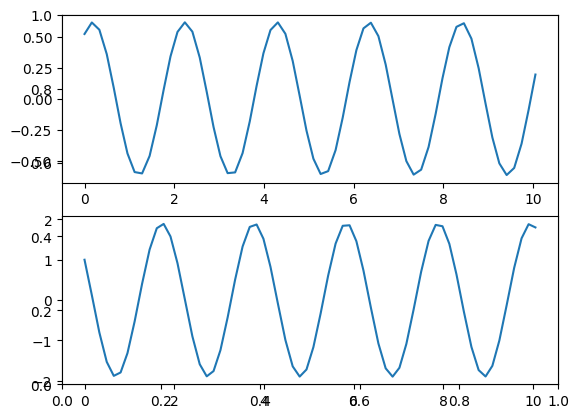

In [11]:
plt.subplots()

plt.subplot(2, 1, 1)
plt.plot(step_history, x_history[:,0])

plt.subplot(2, 1, 2)
plt.plot(step_history, x_history[:,1])

plt.show()

In [12]:
print(x_history[-1])

array([0.19583128, 1.80312859, 0.19458199, 0.98088626])